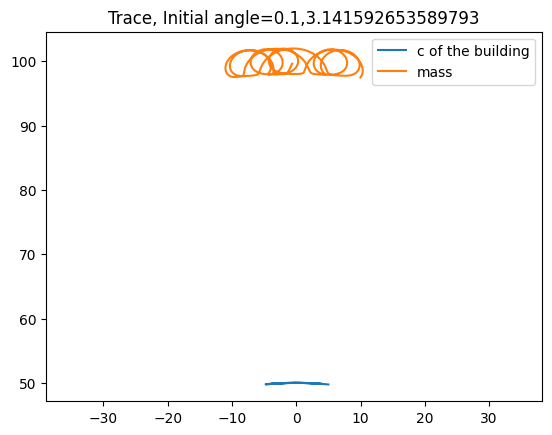

In [61]:
from math import sin,cos
import math
import numpy as np
from scipy.integrate import odeint

g = 9.8

class DoublePendulum(object):
    def __init__(self, m1, m2, l1, l2):
        self.m1, self.m2, self.l1, self.l2 = m1, m2, l1, l2
        self.init_status = np.array([0.0,0.0,0.0,0.0])
        
    def equations(self, w, t):
        """
        微分方程公式
        """
        m1, m2, l1, l2 = self.m1, self.m2, self.l1, self.l2
        th1, th2, v1, v2 = w
        dth1 = v1
        dth2 = v2
        
        #eq of th1
        a = l1*l1*(2*m1+6*m2)  # dv1 parameter
        b = l1*m2*l2*6*cos(th1-th2) # dv2 paramter
        c = l1*(6*m2*l2*sin(th1-th2)*dth2*dth2 - (3*m1+6*m2)*g*sin(th1)) + 1000*th1
        
        #eq of th2
        d = m2*l2*l1*cos(th1-th2) # dv1 parameter
        e = m2*l2*l2 # dv2 parameter
        f = m2*l2*(-l1*sin(th1-th2)*dth1*dth1 - g*sin(th2))
        
        dv1, dv2 = np.linalg.solve([[a,b],[d,e]], [c,f])
        
        return np.array([dth1, dth2, dv1, dv2])
        
def double_pendulum_odeint(pendulum, ts, te, tstep):
    """
    对双摆系统的微分方程组进行数值求解，返回两个小球的X-Y坐标
    """
    t = np.arange(ts, te, tstep)
    track = odeint(pendulum.equations, pendulum.init_status, t)
    th1_array, th2_array = track[:,0], track[:, 1]
    l1, l2 = pendulum.l1, pendulum.l2
    x1 = l1*np.sin(th1_array)/2
    y1 = l1*np.cos(th1_array)/2
    x2 = l1*np.sin(th1_array) + l2*np.sin(th2_array)
    y2 = l1*np.cos(th1_array) + l2*np.cos(th2_array)
    pendulum.init_status = track[-1,:].copy() #将最后的状态赋给pendulum
    return [x1, y1, x2, y2]

if __name__ == "__main__":    
    import matplotlib.pyplot as pl
    pendulum = DoublePendulum(10.0, 1.0, 100.0, 2.0) 
    th1, th2 = 0.1, math.pi
    pendulum.init_status[:2] = th1, th2
    x1, y1, x2, y2 = double_pendulum_odeint(pendulum, 0, 30, 0.02)
    pl.plot(x1,y1, label = u"c of the building")
    pl.plot(x2,y2, label = u"mass")
    pl.title(u"Trace, Initial angle=%s,%s" % (th1, th2))
    pl.legend()
    pl.axis("equal")
    pl.show()
